In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../..")
import os

import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchgeo.datasets import CanadianBuildingFootprints
from torchgeo.samplers import RandomGeoSampler
from torchgeo.datasets.utils import BoundingBox

In [2]:
ROOT_DIR = os.path.expanduser("~/ssdprivate/cbf/")

## Visualization example

In [3]:
%%time
ds = CanadianBuildingFootprints(
    ROOT_DIR,
    download=False,
    checksum=False
)

CPU times: user 3min 5s, sys: 1.68 s, total: 3min 7s
Wall time: 3min 6s


In [13]:
ds.bounds

BoundingBox(minx=-141.008104, maxx=-52.621493, miny=41.73535, maxy=74.773117, mint=0.0, maxt=9.223372036854776e+18)

In [4]:
bounds = BoundingBox(-79.69096183776855,-79.68220710754395,43.78839898848133,43.79482711775757,0,1)

In [5]:
ds.bounds.intersects(bounds)

True

In [6]:
%%time
sample = ds[bounds]

CPU times: user 1min, sys: 597 ms, total: 1min
Wall time: 1min


In [7]:
sample["masks"].shape

torch.Size([642, 875])

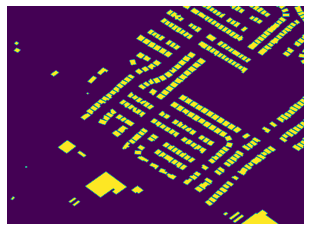

In [8]:
ds.plot(sample["masks"])

## DataLoader example

In [9]:
sampler = RandomGeoSampler(
    roi=ds.bounds,
    size=256,
    length=48
)

In [11]:
dataloader = DataLoader(ds, sampler=sampler, batch_size=32)

In [12]:
for batch_idx, batch in enumerate(dataloader):
    print(batch["masks"].shape)

ValueError: empty range for randrange() (-141, -307, -166)